In [1]:
import pandas as pd  
import numpy as np  
import math
import random
import operator
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# Creation dataset

In [2]:
random.seed(98103)
n = 50
x = np.array([random.random() for i in range(n)])
sin = lambda x: math.sin(4*x)
vsin = np.vectorize(sin)
y = vsin(x)

Adding Gaussian noise to dataset

In [3]:
random.seed(1)
e = np.array([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

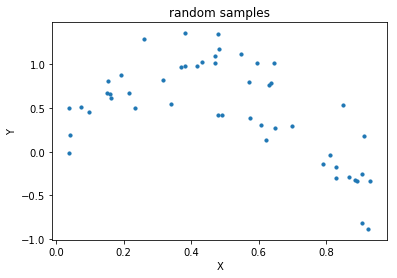

In [4]:
plt.scatter(x,y, s=10)
plt.title("random samples")
plt.xlabel('X')  
plt.ylabel('Y') 
plt.show()

In [5]:
data= pd.DataFrame({'X1': x, 'Y': y})
data.head()

,X1,Y
0,0.259901,1.291599
1,0.645010,1.015651
2,0.041568,0.187619
3,0.646758,0.271723
4,0.904388,-0.822251


# Define a linear fit

In [6]:
# transforming the data to be vertical axis
X = np.vstack(x)
Y = np.vstack(y)

# Split the data into training/testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

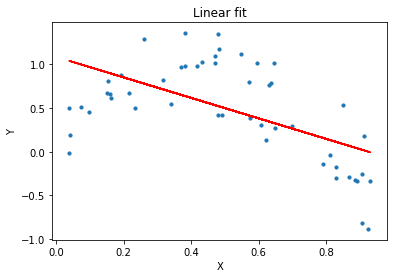

In [7]:
# fit linear model
model = LinearRegression()
model.fit(X_train, Y_train)

# create the predictions on the training set for plot
Y_pred = model.predict(X_train)
plt.scatter(X, Y, s=10)
plt.plot(X_train, Y_pred, color='r')
plt.title("Linear fit")
plt.xlabel('X')  
plt.ylabel('Y') 
plt.show()

In [8]:
Y_pred = model.predict(X_test)
# compute RMSE
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:", rmse)

RMSE: 0.36028299638501077


In [9]:
# Print predictions
pred_df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
pred_df.head()

,Actual,Predicted
0,0.187619,1.038025
1,1.030213,0.578628
2,0.134681,0.357915
3,-0.259203,0.021479
4,0.669617,0.831747


# define a polynomial fit

## Second degree polynomial

In [10]:
# creates the polynomial features
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

df_poly= pd.DataFrame(X_poly)
df_poly.head()

,0,1,2
0,1.0,0.259901,0.067549
1,1.0,0.645010,0.416037
2,1.0,0.041568,0.001728
3,1.0,0.646758,0.418295
4,1.0,0.904388,0.817919


In [11]:
# Split the data into training/testing sets
X_poly_train, X_poly_test, Y_poly_train, Y_poly_test = train_test_split(X_poly, Y, test_size=0.2)

In [12]:
# fit model
model = LinearRegression()
model.fit(X_poly_train, Y_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

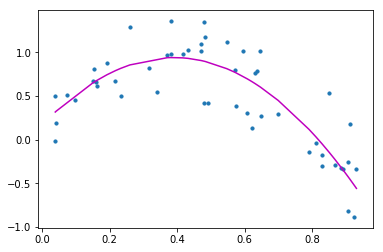

In [13]:
# Make predictions for plot
Y_poly_pred = model.predict(X_poly_train)
X_train=X_poly_train[ : , 1]

plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,Y_poly_pred), key=sort_axis)
X_test_z, Y_poly_pred = zip(*sorted_zip)
plt.plot(X_test_z, Y_poly_pred, color='m')
plt.show()

In [14]:
Y_poly_pred = model.predict(X_poly_test)
# compute RMSE
rmse = np.sqrt(mean_squared_error(Y_poly_test,Y_poly_pred))
print(rmse)

0.2599887954687335


In [15]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [[ 0.          3.96871171 -5.10557165]]


## 4th order polynomial

In [16]:
# creates the polynomial features
polynomial_features= PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X)

# Split the data into training/testing sets
X_poly_train, X_poly_test, Y_poly_train, Y_poly_test = train_test_split(X_poly, Y, test_size=0.1)

In [17]:
# fit model
model = LinearRegression()
model.fit(X_poly_train, Y_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

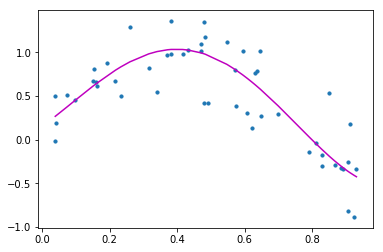

In [18]:
# Make predictions for plot
Y_poly_pred = model.predict(X_poly_train)
X_train=X_poly_train[ : , 1]

plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,Y_poly_pred), key=sort_axis)
X_test_z, Y_poly_pred = zip(*sorted_zip)
plt.plot(X_test_z, Y_poly_pred, color='m')
plt.show()

In [19]:
Y_poly_pred = model.predict(X_poly_test)
# compute RMSE
rmse = np.sqrt(mean_squared_error(Y_poly_test,Y_poly_pred))
print(rmse)

0.3571679492251173


In [20]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [[  0.           2.73676547   4.80316986 -20.09810687  11.88203401]]


## high order polynomial

In [21]:
# creates the polynomial features
polynomial_features= PolynomialFeatures(degree=20)
X_poly = polynomial_features.fit_transform(X)

# Split the data into training/testing sets
X_poly_train, X_poly_test, Y_poly_train, Y_poly_test = train_test_split(X_poly, Y, test_size=0.1)

In [22]:
# fit model
model = LinearRegression()
model.fit(X_poly_train, Y_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

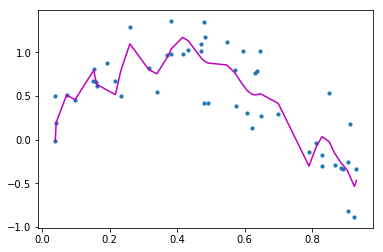

In [23]:
# Make predictions for plot
Y_poly_pred = model.predict(X_poly_train)
X_train=X_poly_train[ : , 1]

plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,Y_poly_pred), key=sort_axis)
X_test_z, Y_poly_pred = zip(*sorted_zip)
plt.plot(X_test_z, Y_poly_pred, color='m')
plt.show()

In [24]:
Y_poly_pred = model.predict(X_poly_test)
# compute RMSE
rmse = np.sqrt(mean_squared_error(Y_poly_test,Y_poly_pred))
print(rmse)

0.3695587711518626


In [25]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [[ 0.00000000e+00 -6.83277328e+03  3.33727715e+05 -8.90666401e+06
   1.48130714e+08 -1.65378981e+09  1.29993131e+10 -7.42621591e+10
   3.14693281e+11 -9.99771475e+11  2.38142651e+12 -4.18823778e+12
   5.18462585e+12 -3.84810148e+12  1.87867579e+11  3.52244639e+12
  -4.80758109e+12  3.54611910e+12 -1.59815505e+12  4.15584976e+11
  -4.81397354e+10]]


## Ridge regularization on Polynomial fit

In [26]:
# train model
clf = Ridge()
clf.set_params(alpha=6)
clf.fit(X_poly_train, Y_poly_train)

Ridge(alpha=6, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

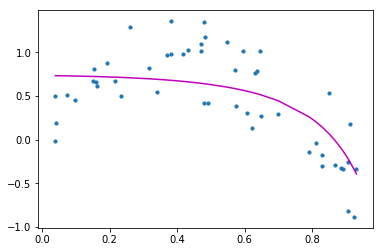

In [27]:
# Make predictions for plot
Y_poly_pred = clf.predict(X_poly_train)

plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,Y_poly_pred), key=sort_axis)
X_test_z, Y_poly_pred = zip(*sorted_zip)
plt.plot(X_test_z, Y_poly_pred, color='m')
plt.show()

In [28]:
# The coefficients
print('Coefficients: \n', clf.coef_)

Coefficients: 
 [[ 0.         -0.04387758 -0.15035972 -0.18513443 -0.18584354 -0.17325475
  -0.1564661  -0.13929542 -0.12324824 -0.1088227  -0.09608613 -0.08493205
  -0.0751943  -0.06669697 -0.05927478 -0.05278036 -0.0470856  -0.04208046
  -0.03767105 -0.03377739 -0.03033135]]


## Lasso regularization of polynomial fit

In [29]:
clf = linear_model.Lasso()

clf.set_params(alpha=0.01)
clf.fit(X_poly_train, Y_poly_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

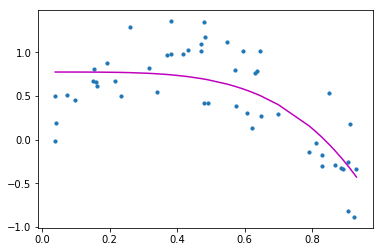

In [30]:
# Make predictions for plot
Y_poly_pred = clf.predict(X_poly_train)

plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,Y_poly_pred), key=sort_axis)
X_test_z, Y_poly_pred = zip(*sorted_zip)
plt.plot(X_test_z, Y_poly_pred, color='m')
plt.show()

In [31]:
# The coefficients
print('Coefficients: \n', clf.coef_)

Coefficients: 
 [ 0.          0.         -0.         -0.         -1.44504232 -0.17132867
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]


# Ridge regularization

## Generate random dataset

In [32]:
X, Y, w = make_regression(n_samples=10, n_features=30, coef=True,
                          random_state=1, bias=3.5)

In [33]:
model = LinearRegression()
model.fit(X, Y)
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 11.45119607  -0.76260166   3.58281604 -13.32927862   8.96519079
   2.35737674   1.14585731 -19.20726875  -9.28233318  24.83903079
  39.94705464  13.01061195 -18.00513      9.55785479 -27.09722778
 -16.66596294  34.15737705  -5.11144826  15.83752373 -21.20679823
  33.14841756  -5.91692192  14.56348201  13.9680289    2.66587244
 -12.28497667   0.57576766  10.45818254  31.11815504 -34.41120744]


# Ridge regression

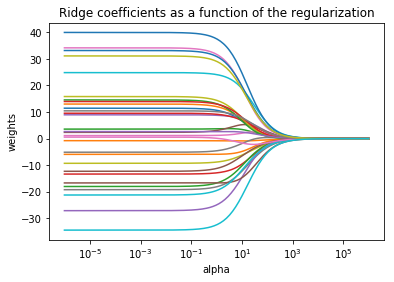

In [34]:
clf = Ridge()
coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, Y)
    coefs.append(clf.coef_)

# Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.show()

# Lasso regularization

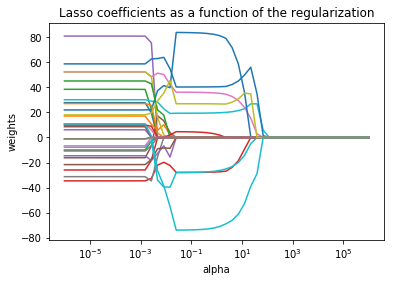

In [35]:
clf = linear_model.Lasso()
coefs = []
errors = []

alphas = np.logspace(-6, 6)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a, max_iter=10000)
    clf.fit(X, Y)
    coefs.append(clf.coef_)

# Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

plt.show()

# Regression on the (in)famous Boston housing dataset

In [36]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# Load data
boston = load_boston()
X = boston.data
Y = boston.target

# Scale features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [37]:
# description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

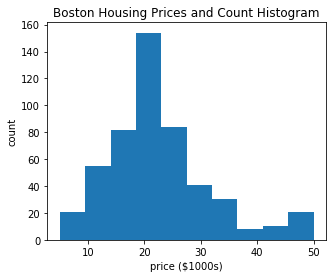

In [38]:
plt.figure(figsize=(5, 4))
plt.hist(boston.target)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

In [39]:
# prepare cross validation
ridge = Ridge()
# 3 fold random shuffle before split and random seed for shuffle 1
kfold = KFold(10, True, 1)
# enumerate alpha to test
parameters = {'alpha': np.logspace(-6, 6, 200)}

# in GridSearch because The unified scoring API always maximizes the score, so scores which 
#need to be minimized are negated in order for the unified scoring API to work correctly. 
#The score that is returned is therefore negated when it is a score that should be minimized and left 
#positive if it is a score that should be maximized.
ridge_regressor= GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X_std, Y)

print(ridge_regressor.best_params_)
best_MSE=-ridge_regressor.best_score_
best_RMSE=np.sqrt(best_MSE)
print(best_RMSE)

{'alpha': 91.15888299750819}
5.569088816706782


/Users/aponsero/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
# get coefficients for the best model
coeff_df = pd.DataFrame(ridge_regressor.best_estimator_.coef_, boston.feature_names)  
print(coeff_df)

                0
CRIM    -0.661156
ZN       0.594473
INDUS   -0.391542
CHAS     0.741365
NOX     -0.967147
RM       2.791203
AGE     -0.167069
DIS     -1.758254
RAD      0.755862
TAX     -0.632341
PTRATIO -1.682683
B        0.785674
LSTAT   -3.009221


## Notes:
It is also possible to use the RidgeCV function (but only able to maximize the R2 parameter

from sklearn.linear_model import RidgeCV

alpha= np.logspace(-6, 6, 200)

clf = RidgeCV(alphas=alpha).fit(X, Y)

clf.score(X, Y)

clf.alpha_

In [42]:
# Do the same for a Lasso regularisation
# prepare cross validation
lasso = Lasso()
# 3 fold random shuffle before split and random seed for shuffle 1
kfold = KFold(10, True, 1)
# enumerate alpha to test
parameters = {'alpha': np.logspace(-6, 6, 200)}

# in GridSearch because The unified scoring API always maximizes the score, so scores which 
#need to be minimized are negated in order for the unified scoring API to work correctly. 
#The score that is returned is therefore negated when it is a score that should be minimized and left 
#positive if it is a score that should be maximized.
lasso_regressor= GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_std, Y)

print(lasso_regressor.best_params_)
best_MSE=-lasso_regressor.best_score_
best_RMSE=np.sqrt(best_MSE)
print(best_RMSE)

{'alpha': 0.13354515629298974}
5.81297956026396


/Users/aponsero/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
# get coefficients for the best model
coeff_df = pd.DataFrame(lasso_regressor.best_estimator_.coef_, boston.feature_names)  
print(coeff_df)

                0
CRIM    -0.533089
ZN       0.583739
INDUS   -0.042917
CHAS     0.649171
NOX     -1.416873
RM       2.876867
AGE     -0.000000
DIS     -2.190183
RAD      0.706476
TAX     -0.436270
PTRATIO -1.877313
B        0.732772
LSTAT   -3.722139
